# SESSION B: 爬蟲實戰與資料分析

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd


## 範例 03: BeautifulSoup + Regular Expression

透過 BeautifulSoup 加上 Regular Expression ，能夠輕鬆的找出所有符合您規則的標籤、屬性或是內容。

與 Regular Expression 的 **re.findall** 不同在於，這邊必須用 **re.compile**，如此一來 BeautifulSoup 就會知道您要使用 Regular Expression，並且回傳所有符合條件的標籤、屬性或是內容。

In [2]:
# 萬年起手式
response = requests.get("https://jimmy15923.github.io/example_page")
soup = BeautifulSoup(response.text, 'lxml')

In [3]:
soup.find_all(re.compile("t(d|r)"))  # 找出所有 td 或 tr 的標籤

[<tr>
 <th>標頭 1 (table-header)</th>
 <th>標頭 2 (table-header)</th>
 <th>標頭 3 (table-header)</th>
 <th>標頭 4 (table-header)</th>
 </tr>, <tr>
 <td> 列2 欄1 </td>
 <td class="zzz">列2 欄2 (我的屬性 class="zzz")</td>
 <td>
 <a href="http://www.yahoo.com.tw">列2 欄3 (我是 a 標籤，屬性 href=網址)</a>
 </td>
 <td>
 <a href="http://foundation.datasci.tw/">列2 欄4 (資料協會)</a>
 </td>
 </tr>, <td> 列2 欄1 </td>, <td class="zzz">列2 欄2 (我的屬性 class="zzz")</td>, <td>
 <a href="http://www.yahoo.com.tw">列2 欄3 (我是 a 標籤，屬性 href=網址)</a>
 </td>, <td>
 <a href="http://foundation.datasci.tw/">列2 欄4 (資料協會)</a>
 </td>, <tr>
 <td value="5566">列3 欄1</td>
 <td>列3 欄2
 				<oi>
 <li class="zz">我是 li 標籤 (列表)，屬性 class="zz"</li>
 <li>第二個 li 標籤</li>
 </oi></td>
 <td>
 <a href="http://foundation.datasci.tw/python-ml-170812/" id="hyperlink">列3 欄3 (資料協會-python 爬蟲實戰)</a>
 </td>
 <td class="zzzz">列3 欄4 (我的屬性 class="zzzz")</td>
 </tr>, <td value="5566">列3 欄1</td>, <td>列3 欄2
 				<oi>
 <li class="zz">我是 li 標籤 (列表)，屬性 class="zz"</li>
 <li>第二個 li 標籤</l

In [4]:
soup.find_all("", {"class":re.compile("z+")})    # 找出所有屬性為 class 且值包含至少一個 z 以上的標籤

[<div class="zzz" id="id1">我是有著屬性 class="zzz" 的標籤內容</div>,
 <td class="zzz">列2 欄2 (我的屬性 class="zzz")</td>,
 <li class="zz">我是 li 標籤 (列表)，屬性 class="zz"</li>,
 <td class="zzzz">列3 欄4 (我的屬性 class="zzzz")</td>]

In [5]:
print(soup.find_all("", text = re.compile("python")))  # 找出所有 text 內容包含 python 文字的標籤

['網頁名稱-python crawler', 'python_crawler', '列3 欄3 (資料協會-python 爬蟲實戰)', 'python_crawler']


## 練習 03: BeautifulSoup + Regular Expression (8 mins)

請找出[範例網頁中](https://jimmy15923.github.io/example_page)，所有標籤且其屬性 href 的超連結網址是資料科學協會網站 ("http://foundation.datasci.tw/...")

In [6]:
# your codes


請觀察[518 黃頁網](http://yp.518.com.tw/service-life.html?ctf=10)，並找出所有位在新北市的店家地址

In [7]:
# your codes


-------------------------
## 範例 04: 如何使用 POST

請打開[高鐵時刻表](https://www.thsrc.com.tw/tw/TimeTable/SearchResult)的網頁，並按照 slides 的介紹，觀察 requests 的方式

In [8]:
# 這是我們還沒有給任何 form_data 的 requests
response = requests.get("https://www.thsrc.com.tw/tw/TimeTable/SearchResult")
print(response.encoding)
soup = BeautifulSoup(response.text, "lxml")

utf-8


In [9]:
# 觀察 option 裡面的 value
soup.find_all("option", {"value":re.compile("[a-z0-9]{8}-[a-z0-9]{4}")})

[<option value="2f940836-cedc-41ef-8e28-c2336ac8fe68"> 南港站</option>,
 <option value="977abb69-413a-4ccf-a109-0272c24fd490"> 台北站</option>,
 <option value="e6e26e66-7dc1-458f-b2f3-71ce65fdc95f"> 板橋站</option>,
 <option value="fbd828d8-b1da-4b06-a3bd-680cdca4d2cd"> 桃園站</option>,
 <option value="a7a04c89-900b-4798-95a3-c01c455622f4"> 新竹站</option>,
 <option value="e8fc2123-2aaf-46ff-ad79-51d4002a1ef3"> 苗栗站</option>,
 <option value="3301e395-46b8-47aa-aa37-139e15708779"> 台中站</option>,
 <option value="38b8c40b-aef0-4d66-b257-da96ec51620e"> 彰化站</option>,
 <option value="5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f"> 雲林站</option>,
 <option value="60831846-f0e4-47f6-9b5b-46323ebdcef7"> 嘉義站</option>,
 <option value="9c5ac6ca-ec89-48f8-aab0-41b738cb1814"> 台南站</option>,
 <option value="f2519629-5973-4d08-913b-479cce78a356"> 左營站</option>,
 <option value="2f940836-cedc-41ef-8e28-c2336ac8fe68"> 南港站</option>,
 <option value="977abb69-413a-4ccf-a109-0272c24fd490"> 台北站</option>,
 <option value="e6e26e66-7dc1-458f

In [10]:
# 在還沒給任何 form_data 之前，我們是看不到搜尋後的結果的
print(soup.find("section", class_ = "result_table"))

None


In [11]:
# 將 form_data 透過 post 的方式進行 requests
form_data = {"StartStation":"2f940836-cedc-41ef-8e28-c2336ac8fe68",
             "EndStation":"e6e26e66-7dc1-458f-b2f3-71ce65fdc95f",
             "SearchDate":"2017/08/13",
             "SearchTime":"20:30",
             "SearchWay":"DepartureInMandarin"}
response_post = requests.post("https://www.thsrc.com.tw/tw/TimeTable/SearchResult", data = form_data)
soup_post = BeautifulSoup(response_post.text, "lxml")

In [12]:
# 用同樣的搜尋條件，可以看到搜尋後的結果
soup_post.find("section", class_ = "result_table")

<section class="result_table">
<table>
<tr>
<th colspan="4" scope="col">車次資訊</th>
<th colspan="1" scope="col">適用優惠</th>
<th rowspan="2" scope="col">備註</th>
</tr>
<tr>
<th class="column1" scope="col">車次</th>
<th class="column3" scope="col">出發時間</th>
<th class="column4" scope="col">抵達時間</th>
<th class="column2" scope="col">行車時間</th>
<th class="Width1" scope="col">早鳥</th>
</tr>
<tr>
<td class="toTouch" colspan="7">
<table class="touch_table"><tr>
<td class="column1"><a href="?ID=U3RhcnRTdGF0aW9uPTJmOTQwODM2LWNlZGMtNDFlZi04ZTI4LWMyMzM2YWM4ZmU2OCZFbmRTdGF0aW9uPWU2ZTI2ZTY2LTdkYzEtNDU4Zi1iMmYzLTcxY2U2NWZkYzk1ZiZTZWFyY2hEYXRlPTIwMTcvMDgvMTMmU2VhcmNoVGltZT0yMDozMCZTZWFyY2hXYXk9RGVwYXJ0dXJlSW5NYW5kYXJpbiZSZXN0VGltZT0mRWFybHlPckxhdGVyPSZTdGF0aW9uTGluZUN1cnJlbnQ9MDY4Nw==" title="0687">0687</a></td>
<td class="column3">20:35</td>
<td class="column4">20:54</td>
<td class="column2">00:19</td>
<td class="Width1"> <em style="background:#f00d67">8折起</em></td>
<td> </td>
</tr>
</table>
<div class="touch_

## 練習 04: 如何使用 POST (8 mins)
請運用 POST 方式，找出 2017 年 8 月 14 日 21:30，**南港站**到**台南站**共有幾個班次?

Hint: 先到高鐵時刻表網站，實際查詢之後，看看班次的資訊都藏在哪些 tags 裡面

In [7]:
# your codes
# 將要查詢的資料寫成 dictionary
form_data = {
 "StartStation":"2f940836-cedc-41ef-8e28-c2336ac8fe68",
 "EndStation":"9c5ac6ca-ec89-48f8-aab0-41b738cb1814",
 "SearchDate":"2017/08/14",
 "SearchTime":"21:30", 
 "SearchWay":"DepartureInMandarin"}

# requests 改用 POST，並放入 form_data 
response_post = requests.post("https://www.thsrc.com.tw/tw/TimeTable/SearchResult", data = form_data)
soup_post = BeautifulSoup(response_post.text, "lxml")

# 找出有幾個 td 標籤，屬性為 class=column1
print(len(soup_post.find_all("td", class_="column1")))


3


---
## 範例 05 : 使用 pandas 儲存資料

pandas 是 Python 中處理數據非常強大的一個函式庫，不論是讀寫 Data、清洗、轉換、分析等，均有許多方便好用的函數幫忙，熟悉 pandas 可以說是用 Python 做資料分析的第一步!

範例 05 將會帶大家學習如何使用 pandas 將我們抓取的資料存成結構化的數據

補充資料
* [pandas 官方文檔](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [pandas tutourials](http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html)
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Python for Data Analysis 電子書](http://www3.canisius.edu/~yany/python/Python4DataAnalysis.pdf)

### 1. 使用 columns 來建立 DataFrame

In [14]:
# 將要查詢的資料寫成 dictionary
form_data = {
 "StartStation":"2f940836-cedc-41ef-8e28-c2336ac8fe68",
 "EndStation":"9c5ac6ca-ec89-48f8-aab0-41b738cb1814",
 "SearchDate":"2017/08/14",
 "SearchTime":"21:30", 
 "SearchWay":"DepartureInMandarin"}

response_post = requests.post("https://www.thsrc.com.tw/tw/TimeTable/SearchResult", data = form_data) # 使用 POST
soup_post = BeautifulSoup(response_post.text, "lxml") # 用 BeautifulSoup 解析網頁

In [15]:
train_number = [tag.text for tag in soup_post.find_all("td", class_="column1")] # 找出所有 td 標籤 屬性 class=column1 的內容，並存成 List
departure = [tag.text for tag in soup_post.find_all("td", class_="column3")] # 找出所有 td 標籤 屬性 class=column3 的內容，並存成 List
arrival = [tag.text for tag in soup_post.find_all("td", class_="column4")] # 找出所有 td 標籤 屬性 class=column4 的內容，並存成 List
travel_time = [tag.text for tag in soup_post.find_all("td", class_="column2")] # 找出所有 td 標籤 屬性 class=column2 的內容，並存成 List

In [16]:
highway_df = pd.DataFrame({"車次":train_number,
                          "出發時間":departure,
                          "抵達時間":arrival,
                          "行車時間":travel_time}, columns = ["車次", "出發時間", "抵達時間", "行車時間"])

In [17]:
highway_df 

,車次,出發時間,抵達時間,行車時間
0,0693,21:30,23:27,01:57
1,0333,21:45,23:41,01:56
2,0295,22:05,23:47,01:42


In [18]:
highway_df.to_csv("csv_results/demo6_highway_schedule.csv", index = False, encoding = "cp950")

### 2. 使用 rows 來建立 DataFrame

In [19]:
# 將要查詢的資料寫成 dictionary
form_data = {
 "StartStation":"2f940836-cedc-41ef-8e28-c2336ac8fe68",
 "EndStation":"9c5ac6ca-ec89-48f8-aab0-41b738cb1814",
 "SearchDate":"2017/08/14",
 "SearchTime":"21:30", 
 "SearchWay":"DepartureInMandarin"}

response_post = requests.post("https://www.thsrc.com.tw/tw/TimeTable/SearchResult", data = form_data) # 使用 POST
soup_post = BeautifulSoup(response_post.text, "lxml") # 用 BeautifulSoup 解析網頁

In [20]:
highway_df = pd.DataFrame(columns = ["車次", "出發時間", "抵達時間", "行車時間"]) # 先建立好 DataFrame 

In [21]:
for i in range(3):
    print(i)
    row = soup_post.find_all("table", class_="touch_table")[i] # table 這個標籤包含所有行車資訊，我們用 index 一個一個 by row 取出來
    row_contents = [tag.text for tag in row.find_all("td", class_= re.compile("column"))] # 一個 row 有包含其他資訊，我們只要選出 class 包含 column 的 內容
    highway_df.loc[i] = row_contents # DataFrame 中， 第 i 行的值等於 row_text

0
1
2


In [22]:
highway_df 

,車次,出發時間,抵達時間,行車時間
0,0693,21:30,23:27,01:57
1,0333,21:45,23:41,01:56
2,0295,22:05,23:47,01:42


In [23]:
# for windows
highway_df.to_csv("csv_results/demo6_highway_schedule.csv", index = False, encoding = "cp950")

# for linux
highway_df.to_csv("csv_results/demo6_highway_schedule.csv", index = False, encoding = "utf-8")

## 練習 05 : 使用 pandas 將抓下來的資訊儲存成表格

請觀察[518 黃頁網](http://yp.518.com.tw/service-life.html?ctf=10)，並將店名、地址及電話三個欄位抓下來，並存成表格如 PPT 所示
* 觀察店名、地址及電話都藏在哪些標籤底下? 有共用的屬性嗎?
* 選擇要用 Rows 或 Columns 來組成 DataFrame
* 請將檔案儲存在 csv_results 這個資料夾

In [24]:
# your codes



---
## 範例 code 06: 爬蟲實戰練習
接下來就是大家今天的實戰練習時間囉! 這邊的練習會希望大家能夠自行透過觀察網頁，把目標網頁的資訊爬取回來，並存成 CSV 以利後續的分析。
今天大家要爬取的目標網頁共有兩個
1. [台北票房觀測站 (2016+2017)](http://www.taipeibo.com/year/2017) 的票房資料
2. [Yahoo電影評論](https://tw.movies.yahoo.com/movieinfo_main.html/id=6664)，包含電影名稱、評論文字、評論星等

以下的範例 code 會示範如何抓下[年度周末冠軍](http://www.taipeibo.com/yearly)的網頁資訊，如果真的沒有頭緒的可以參考

In [25]:
res = requests.get("http://www.taipeibo.com/yearly") # 取得網頁
res.encoding ="utf-8" # 設定 encoding = 'utf-8' (如果不設定，會發生甚麼事情呢?)
soup = BeautifulSoup(res.text, 'lxml') # 用 BS4 parse 網頁

In [26]:
# 在觀察網頁之後，發現表格中每一列的文字都躲在 tr 標籤底下，並用 td 包起來。

all_rows = soup.table.find_all("tr") # 找出所有 tr 標籤，並存成 list
print(all_rows[:2]) # 印出前兩筆資料

[<tr class="tb-top">
<th>週次</th>
<th>日期</th>
<th>週末票房總和</th>
<th>漲跌幅</th>
<th>冠軍片名</th>
<th>英文片名</th>
<th class="import">週末票房冠軍</th>
<th>冠軍比例*</th>
</tr>, <tr>
<td class="list-h1" data-th="週次">31</td>
<td class="list-h2" data-th="日期">08/05 - 06</td>
<td class="list-h3" data-th="週末票房總和">7,219,395</td>
<td class="t-down list-h4" data-th="漲跌幅">-72.6%</td>
<td class="list-h5" data-th="冠軍片名">模犯生</td>
<td class="list-h6" data-th="英文片名">Bad Genius</td>
<td class="import list-h7" data-th="周末票房冠軍">1,502,754</td>
<td class="list-h8" data-th="冠軍比例">20.82%</td>
</tr>]


In [27]:
column_name_tag = all_rows[0] # 標題名稱的標籤就是 all_rows 的第一筆資料 

In [28]:
print([text for text in column_name_tag.stripped_strings]) # 把使用 strpped_strings 取出來的值印出來，可以看到就是我們想要的標題
column_name = [text for text in column_name_tag.stripped_strings] # 把這些標題存成 column_name 這個變數

['週次', '日期', '週末票房總和', '漲跌幅', '冠軍片名', '英文片名', '週末票房冠軍', '冠軍比例*']


In [29]:
movie_df = pd.DataFrame(columns = column_name) # 建立一個空的 DataFrame，標題等於剛剛抓下來的 column_name
movie_df

,週次,日期,週末票房總和,漲跌幅,冠軍片名,英文片名,週末票房冠軍,冠軍比例*


In [30]:
movie_df = pd.DataFrame(columns = column_name) # 第一個 row 為標題
for i, row in enumerate(all_rows[1:]): # 從第二個 row 開始 iterate (因為第一個 row 是標題)
    data_want = [s for s in row.stripped_strings]
    print(data_want)
    movie_df.loc[i] = data_want # 設定 DataFrame 的第 i 個 row 是我們抓下來的資訊

['31', '08/05 - 06', '7,219,395', '-72.6%', '模犯生', 'Bad Genius', '1,502,754', '20.82%']
['30', '07/29 - 30', '26,392,639', '-28.2%', '敦克爾克大行動', 'Dunkirk', '6,008,394', '22.77%']
['29', '07/22 - 23', '36,766,707', '-11.5%', '敦克爾克大行動', 'Dunkirk', '11,143,938', '30.31%']
['28', '07/15 - 16', '41,532,307', '-1.7%', '猩球崛起：終極決戰', 'War for the Planet of the Apes', '13,670,006', '32.91%']
['27', '07/08 - 09', '42,249,157', '+26.7%', '蜘蛛人：返校日', 'Spider-Man: Homecoming', '25,573,718', '60.53%']
['26', '07/01 - 02', '33,342,350', '+1.7%', '神偷奶爸3', 'Despicable Me 3', '13,361,083', '40.07%']
['25', '06/24 - 25', '32,798,987', '+7.1%', '變形金剛5：最終騎士', 'Transformers: The Last Knight', '18,392,933', '56.08%']
['24', '06/17 - 18', '30,627,483', '-35.8%', '神鬼傳奇', 'The Mummy', '11,822,715', '38.60%']
['23', '06/10 - 11', '47,690,608', '+16.1%', '神鬼傳奇', 'The Mummy', '25,342,873', '53.14%']
['22', '06/03 - 04', '41,065,920', '+2.0%', '神力女超人', 'Wonder Woman', '22,552,902', '54.92%']
['21', '05/27 - 28', '40,2

In [31]:
movie_df.head() # 大功告成! 就只剩把 DataFrame 存起來就好，那接下來就請聰明的各位來練習一下囉!

,週次,日期,週末票房總和,漲跌幅,冠軍片名,英文片名,週末票房冠軍,冠軍比例*
0,31,08/05 - 06,"7,219,395",-72.6%,模犯生,Bad Genius,"1,502,754",20.82%
1,30,07/29 - 30,"26,392,639",-28.2%,敦克爾克大行動,Dunkirk,"6,008,394",22.77%
2,29,07/22 - 23,"36,766,707",-11.5%,敦克爾克大行動,Dunkirk,"11,143,938",30.31%
3,28,07/15 - 16,"41,532,307",-1.7%,猩球崛起：終極決戰,War for the Planet of the Apes,"13,670,006",32.91%
4,27,07/08 - 09,"42,249,157",+26.7%,蜘蛛人：返校日,Spider-Man: Homecoming,"25,573,718",60.53%


## 練習 06-1: 台北票房觀測站爬蟲
請將 2016 [年度排名](http://www.taipeibo.com/year/2017)與 2017 的[年度排名](http://www.taipeibo.com/year/2017) 網頁分別抓下來 並存成一個 csv 檔案

Hint
* DF = df1.append(df2) 這段 code 可以把兩個 DataFrame 合併成一個新的 DF

In [32]:
# your codes



## 練習 06-2: Yahoo 電影評論爬蟲

請仔細觀察 Yahoo 電影評論的網頁，您將需要把任何一部在票房排行榜上您喜歡的電影的
1. 電影名稱 
2. 每條評論文字
3. 每條評論星等

都爬取下來並存成 CSV


這題的難易度稍微難一些，如果卡住請大家不要灰心，隨時可以與旁邊的同學討論或是請問助教，以下是一些提示
1. 請先觀察每一頁評論的網址都是甚麼，有沒有甚麼特殊的規律?
2. 如果要抓取總共有幾頁評論，要怎麼抓取哪個標籤呢?
3. 評論文字都藏在哪些標籤裡?
4. 評論有幾顆星星好像找不到? 說不定在意想不到的地方喔
5. 如何把每一頁抓完的評論 list 合併成一個 大 list? 可以參考 big_list.extend(small_list)

In [33]:
# your codes



-----

---

## 範例 07: 資料清理與分析

到這邊我們已經將需要的票房資料與評論星等、內容都爬下來囉!

在進入分析之前，我們需要對我們的資料做一些簡單的清洗

### 1. 票房資料清洗

In [34]:
movie_box = pd.read_csv("data/movies_box_office.csv")
movie_box.head()

,排名,中文片名,英文片名,院數,映期,上映日期,平均票房,累積票房,年度
0,1,美國隊長3 : 英雄內戰,Captain America 3,24,86,2016/04/27,"7,652,852","183,668,450",2016
1,2,惡棍英雄：死侍,Deadpool,23,80,2016/02/09,"6,200,975","142,622,425",2016
2,3,屍速列車,Train to Busan,22,78,2016/09/02,"6,047,077","133,035,683",2016
3,4,怪獸與牠們的產地,Fantastic Beasts and Where to Find Them,24,113,2016/11/17,"4,942,212","118,613,078",2016
4,5,奇異博士,Doctor Strange,23,108,2016/10/25,"5,049,736","116,143,931",2016


In [35]:
movie_box["平均票房"] = movie_box["平均票房"].str.replace(",", "").astype("float")
movie_box["累積票房"] = movie_box["累積票房"].str.replace(",", "").astype("float")

In [36]:
movie_box.head()

,排名,中文片名,英文片名,院數,映期,上映日期,平均票房,累積票房,年度
0,1,美國隊長3 : 英雄內戰,Captain America 3,24,86,2016/04/27,7652852.0,183668450.0,2016
1,2,惡棍英雄：死侍,Deadpool,23,80,2016/02/09,6200975.0,142622425.0,2016
2,3,屍速列車,Train to Busan,22,78,2016/09/02,6047077.0,133035683.0,2016
3,4,怪獸與牠們的產地,Fantastic Beasts and Where to Find Them,24,113,2016/11/17,4942212.0,118613078.0,2016
4,5,奇異博士,Doctor Strange,23,108,2016/10/25,5049736.0,116143931.0,2016


In [37]:
movie_box.to_csv("data/movies_box_office_revised.csv", index = False, encoding="utf-8")

### 2. 評論資料清洗

In [38]:
movies_comments = pd.read_csv("data/movies_comments.csv")
movies_comments.head()

,comments,movie,star
0,難看.機場戰鬥變兒戲.鋼鐵人跟美國隊長戰鬥更是沒壯觀場面.普通拳打腳踢.特效動作場面都普普通通.,美國隊長3：英雄內戰\n Captain America: Civil War\n,1
1,"中間看到睡著,梗沒什麼變化,打來打去而已...",美國隊長3：英雄內戰\n Captain America: Civil War\n,3
2,漫威這次終於拍出富有劇情內涵&精彩動作的電影了真的是今年目前最好看的超級英雄電影!!!如果只...,美國隊長3：英雄內戰\n Captain America: Civil War\n,5
3,只覺得黑寡婦在這部戲裡打得好辛苦啊....演黑寡婦真的越來越不容易了!其他的不方便爆雷囉。但...,美國隊長3：英雄內戰\n Captain America: Civil War\n,5
4,抱著一桶爆米花喝著可樂！享受接下來的時間。不過水不要喝太多！因為毫無冷場的情節你是不會想錯過...,美國隊長3：英雄內戰\n Captain America: Civil War\n,5


In [39]:
movies_comments["movie"].str.split("\n", 2, expand=True).head()

,0,1,2
0,美國隊長3：英雄內戰,Captain America: Civil War,
1,美國隊長3：英雄內戰,Captain America: Civil War,
2,美國隊長3：英雄內戰,Captain America: Civil War,
3,美國隊長3：英雄內戰,Captain America: Civil War,
4,美國隊長3：英雄內戰,Captain America: Civil War,


In [40]:
movies_comments["movie_cht"] = movies_comments["movie"].str.split("\n", 2, expand=True)[0]
movies_comments["movie_eng"] = movies_comments["movie"].str.split("\n", 2, expand=True)[1]
del movies_comments["movie"]

In [41]:
movies_comments.head()

,comments,star,movie_cht,movie_eng
0,難看.機場戰鬥變兒戲.鋼鐵人跟美國隊長戰鬥更是沒壯觀場面.普通拳打腳踢.特效動作場面都普普通通.,1,美國隊長3：英雄內戰,Captain America: Civil War
1,"中間看到睡著,梗沒什麼變化,打來打去而已...",3,美國隊長3：英雄內戰,Captain America: Civil War
2,漫威這次終於拍出富有劇情內涵&精彩動作的電影了真的是今年目前最好看的超級英雄電影!!!如果只...,5,美國隊長3：英雄內戰,Captain America: Civil War
3,只覺得黑寡婦在這部戲裡打得好辛苦啊....演黑寡婦真的越來越不容易了!其他的不方便爆雷囉。但...,5,美國隊長3：英雄內戰,Captain America: Civil War
4,抱著一桶爆米花喝著可樂！享受接下來的時間。不過水不要喝太多！因為毫無冷場的情節你是不會想錯過...,5,美國隊長3：英雄內戰,Captain America: Civil War


In [42]:
movies_comments.to_csv("data/movies_comments_revised.csv", index = False, encoding="utf-8") # 儲存清洗後的資料

## 範例 08: 文字探勘與文字雲

In [43]:
import jieba
import jieba.analyse
import numpy as np
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] # 設定 matplotlib 的中文字體
jieba.set_dictionary('data/dict.txt.big')  # 設定 jiebe 使用斷詞的語料庫

In [44]:
movies_comments = pd.read_csv("data/movies_comments_revised.csv")
neg = movies_comments[(movies_comments["star"] == 1)]  # 取出所有一顆星的評論
pos = movies_comments[(movies_comments["star"] == 5)]  # 取出所有五顆星的評論

In [45]:
neg_text = ''.join(neg["comments"])  # 將 list of string 轉變成一個大字串
pos_text = ''.join(pos["comments"])  # 將 list of string 轉變成一個大字串

In [46]:
jieba.add_word('不好看') # 加上不好看這個詞

Building prefix dict from C:\Users\jimmy\Dropbox\Python爬蟲實戰\Session_B\data\dict.txt.big ...
Loading model from cache C:\Users\jimmy\AppData\Local\Temp\jieba.uda8950e9cc6281215ff7901158e97e5d.cache
Loading model cost 1.170 seconds.
Prefix dict has been built succesfully.


In [47]:
neg_list = jieba.cut(neg_text)  # 將大字串斷詞後變成一個 list
pos_list = jieba.cut(pos_text)  # 將大字串斷詞後變成一個 list

In [48]:
with open('data/stop_words.txt','r', encoding='utf-8') as f:
    stopwords = f.readlines()
    stopwords = [x.replace("\n","") for x in stopwords]
    
neg_text_filtered = ' '.join([word for word in neg_list if word not in stopwords]) #將停止詞濾掉
pos_text_filtered = ' '.join([word for word in pos_list if word not in stopwords]) #將停止詞濾掉

In [49]:
neg_text_list = [item for item in neg_text_filtered.split(" ") if item.split()] #保留非空白的詞
pos_text_list = [item for item in pos_text_filtered.split(" ") if item.split()] #保留非空白的詞

In [50]:
neg_counter = Counter(neg_text_list)
print(neg_counter.most_common(20))

[('難看', 500), ('爛片', 432), ('錢', 234), ('浪費', 233), ('無聊', 227), ('⋯', 193), ('好看', 192), ('拍', 180), ('睡', 176), ('失望', 162), ('特效', 151), ('整部', 146), ('一堆', 142), ('再', 141), ('爛', 141), ('演', 133), ('工讀生', 131), ('看過', 130), ('內容', 124), ('一顆', 123)]


In [51]:
pos_counter = Counter(pos_text_list)
print(pos_counter.most_common(20))

[('好看', 6030), ('超', 1263), ('值得', 1000), ('冷場', 944), ('喜歡', 887), ('不錯', 885), ('讚', 818), ('感人', 816), ('感動', 761), ('推薦', 678), ('推', 672), ('電影院', 667), ('好笑', 626), ('故事', 610), ('最', 588), ('看過', 585), ('很棒', 580), ('特效', 563), ('精彩', 550), ('期待', 549)]


In [52]:
mask_use = "data/circle_mask.png" # 可以改成 "data/Alice_mask.jpg"，在重新執行程式，看看文字雲會怎麼變化
mask = np.array(Image.open(mask_use))

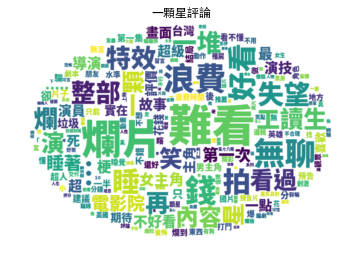

In [53]:
wordcloud = WordCloud(background_color="white", 
                      mask=mask,
                      max_font_size=100,
                      font_path='data/NotoSansCJKtc-Black.otf', 
                      random_state=38).fit_words(neg_counter)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("一顆星評論")
plt.axis("off")
plt.savefig("plots/one_star_wordcloud.png", dpi = 700)
plt.show()

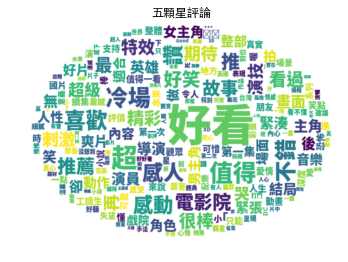

In [54]:
wordcloud = WordCloud(background_color="white",
                      mask=mask, max_font_size=100, 
                      font_path='data/NotoSansCJKtc-Black.otf', 
                      random_state=38).fit_words(pos_counter)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("五顆星評論")
plt.axis("off")
plt.savefig("plots/five_star_wordcloud.png", dpi = 700)
plt.show()

### 透過 TF - IDF 進行文字分析

In [55]:
jieba.analyse.set_stop_words(stop_words_path='data/stop_words.txt')

In [56]:
pos_words = jieba.analyse.extract_tags(pos_text, 500, withWeight=True)
print("TF-IDF 正面評價詞: ", pos_words[:20])

TF-IDF 正面評價詞:  [('好看', 0.35046641848219945), ('冷場', 0.08634639032531179), ('喜歡', 0.08113267819761817), ('不錯', 0.0809497409299798), ('感動', 0.0696076303364007), ('推薦', 0.062015733729408246), ('電影院', 0.0610095787573972), ('感人', 0.05791194316952854), ('看過', 0.053509150784223934), ('很棒', 0.04938324671552741), ('值得', 0.046042084046198105), ('超級', 0.044819630571401245), ('特效', 0.04203198723087989), ('好笑', 0.04028943972794778), ('畫面', 0.03887416937315414), ('演技', 0.037295957661138655), ('緊湊', 0.03640451626003611), ('導演', 0.03613011035857855), ('演員', 0.03567276718948262), ('精彩', 0.03346610862094294)]


In [57]:
neg_words = jieba.analyse.extract_tags(neg_text, 500, withWeight=True)
print("TF-IDF 負面評價詞: ", neg_words[:20])

TF-IDF 負面評價詞:  [('難看', 0.19875586059220587), ('爛片', 0.17172506355166586), ('浪費', 0.09262023103596793), ('無聊', 0.09023516070886146), ('工讀生', 0.05207403547515794), ('看過', 0.051676523753973524), ('整部', 0.0505090388113653), ('內容', 0.049291453426867055), ('特效', 0.04899211883229966), ('一顆', 0.04889394170568265), ('好看', 0.048496240577029996), ('電影院', 0.04770140654212941), ('睡著', 0.04650887137857618), ('不好看', 0.042931265887916466), ('導演', 0.04253375416673206), ('失望', 0.03922571205328589), ('一點', 0.038161125233703526), ('演員', 0.03776361351251912), ('一堆', 0.03596293062804416), ('超級', 0.035776054906597056)]


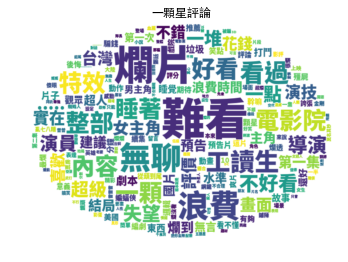

In [58]:
# 經過 TF-IDF 篩選過之後的文字雲
wordcloud = WordCloud(background_color="white", 
                      mask=mask,
                      max_font_size=100,
                      font_path='data/NotoSansCJKtc-Black.otf', 
                      random_state=8).fit_words(dict(neg_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("一顆星評論")
plt.axis("off")
plt.savefig("plots/one_star_wordcloud_tfidf.png", dpi = 700)
plt.show()

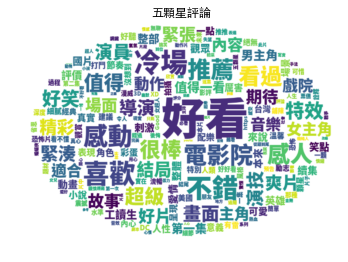

In [59]:
# 經過 TF-IDF 篩選過之後的文字雲
wordcloud = WordCloud(background_color="white", 
                      mask=mask,
                      max_font_size=100,
                      font_path='data/NotoSansCJKtc-Black.otf', 
                      random_state=8).fit_words(dict(pos_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title("五顆星評論")
plt.axis("off")
plt.savefig("plots/five_star_wordcloud_tfidf.png", dpi = 700)
plt.show()

---
## 範例 09: 票房資料分析
範例 09 會示範利用常見的 regression 與 classifictaion 對我們的票房資料做一些資料分析
regression 使用 linear regression，classifictaion 則使用 decision tree

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from scipy.stats import pearsonr

In [81]:
movie_box = pd.read_csv("data/movies_box_office_revised.csv")  # 讀取票房資料

In [82]:
movie_box.head()

,排名,中文片名,英文片名,院數,映期,上映日期,平均票房,累積票房,年度
0,1,美國隊長3 : 英雄內戰,Captain America 3,24,86,2016/04/27,7652852.0,183668450.0,2016
1,2,惡棍英雄：死侍,Deadpool,23,80,2016/02/09,6200975.0,142622425.0,2016
2,3,屍速列車,Train to Busan,22,78,2016/09/02,6047077.0,133035683.0,2016
3,4,怪獸與牠們的產地,Fantastic Beasts and Where to Find Them,24,113,2016/11/17,4942212.0,118613078.0,2016
4,5,奇異博士,Doctor Strange,23,108,2016/10/25,5049736.0,116143931.0,2016


In [83]:
movie_box["平均星等"] = movies_comments.groupby("movie_cht", sort=False)["star"].mean().values # 將平均星等放進票房資料的 DF
movie_box.head()

,排名,中文片名,英文片名,院數,映期,上映日期,平均票房,累積票房,年度,平均星等
0,1,美國隊長3 : 英雄內戰,Captain America 3,24,86,2016/04/27,7652852.0,183668450.0,2016,4.187179
1,2,惡棍英雄：死侍,Deadpool,23,80,2016/02/09,6200975.0,142622425.0,2016,3.538235
2,3,屍速列車,Train to Busan,22,78,2016/09/02,6047077.0,133035683.0,2016,4.296842
3,4,怪獸與牠們的產地,Fantastic Beasts and Where to Find Them,24,113,2016/11/17,4942212.0,118613078.0,2016,4.235714
4,5,奇異博士,Doctor Strange,23,108,2016/10/25,5049736.0,116143931.0,2016,4.156000


In [84]:
# 切 training data 跟 testing data
X_train, X_test, y_train, y_test = train_test_split(movie_box["平均星等"], np.log10(movie_box["平均票房"]), random_state = 22)

# 建立 LinearRegression 模型
reg = LinearRegression()

# 放進 traingin data 進行訓練 (因為只有一個自變數，新版的 sklearn 必須做 reshape)
reg.fit(X = X_train.values.reshape(-1, 1), y = y_train)

# 用 testing data 做 prediction
y_pred = reg.predict(X_test.values.reshape(-1, 1))

# 算出 testing data 與預測結果的 correlation
print(pearsonr(y_pred, y_test)[0])

0.2128264837


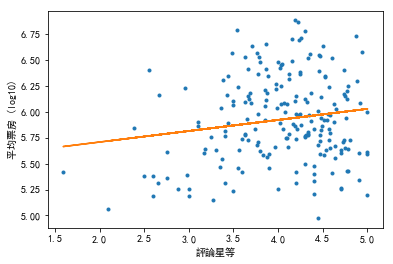

In [85]:
reg.fit(X = movie_box["平均星等"].values.reshape(-1, 1), y = np.log10(movie_box["平均票房"]))
y_pred = reg.predict(movie_box["平均星等"].values.reshape(-1, 1))

plt.plot(movie_box["平均星等"], np.log10(movie_box["平均票房"]), ".")
plt.plot(movie_box["平均星等"], y_pred)
plt.xlabel("評論星等")
plt.ylabel("平均票房 (log10)")
plt.savefig("plots/scatter_plot_star_movie.png", dpi = 700)
plt.tight_layout
plt.show()

### 1. 加上更多 features
加上評論數量、映期等其他 features，看看 performace 會不會變好

In [86]:
movie_box["評論數量"] = movies_comments.groupby("movie_cht", as_index=False, sort=False).size().values

In [87]:
movie_box.head()

,排名,中文片名,英文片名,院數,映期,上映日期,平均票房,累積票房,年度,平均星等,評論數量
0,1,美國隊長3 : 英雄內戰,Captain America 3,24,86,2016/04/27,7652852.0,183668450.0,2016,4.187179,390
1,2,惡棍英雄：死侍,Deadpool,23,80,2016/02/09,6200975.0,142622425.0,2016,3.538235,340
2,3,屍速列車,Train to Busan,22,78,2016/09/02,6047077.0,133035683.0,2016,4.296842,950
3,4,怪獸與牠們的產地,Fantastic Beasts and Where to Find Them,24,113,2016/11/17,4942212.0,118613078.0,2016,4.235714,280
4,5,奇異博士,Doctor Strange,23,108,2016/10/25,5049736.0,116143931.0,2016,4.156000,250


In [88]:
# 做 train/test split
X_train, X_test, y_train, y_test = train_test_split(movie_box[["評論數量", "平均星等", "映期"]], np.log10(movie_box["平均票房"]), random_state = 22)

# 訓練模型
reg.fit(X = X_train, y = y_train)

# 用 testing data 做預測
y_pred = reg.predict(X_test)

# 算出 testing data 與預測結果的 correlation
print(pearsonr(y_pred, y_test)[0])

0.735828489313


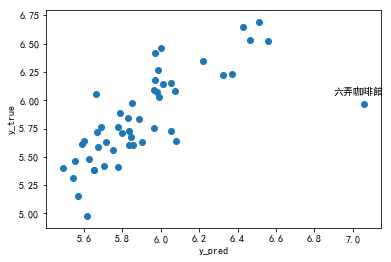

In [89]:
# 把預測結果畫成 Scatter plot
plt.scatter(x=y_pred, y=y_test)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.text(6.9, 6.05, "六弄咖啡館")
plt.show()

## 2. 改成分類問題

In [90]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import f1_score, accuracy_score

In [91]:
movie_box.head()

,排名,中文片名,英文片名,院數,映期,上映日期,平均票房,累積票房,年度,平均星等,評論數量
0,1,美國隊長3 : 英雄內戰,Captain America 3,24,86,2016/04/27,7652852.0,183668450.0,2016,4.187179,390
1,2,惡棍英雄：死侍,Deadpool,23,80,2016/02/09,6200975.0,142622425.0,2016,3.538235,340
2,3,屍速列車,Train to Busan,22,78,2016/09/02,6047077.0,133035683.0,2016,4.296842,950
3,4,怪獸與牠們的產地,Fantastic Beasts and Where to Find Them,24,113,2016/11/17,4942212.0,118613078.0,2016,4.235714,280
4,5,奇異博士,Doctor Strange,23,108,2016/10/25,5049736.0,116143931.0,2016,4.156000,250


In [92]:
movie_box["叫座"] = (movie_box["平均票房"] > movie_box["平均票房"].median()) * 1  # 設定 叫座  = 平均票房大於中位數

In [93]:
X_train, X_test, y_train, y_test = train_test_split(movie_box[["評論數量", "平均星等", "映期"]], movie_box["叫座"], random_state = 22)

In [94]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [95]:
print("feature importance")
print("評論數量: ",clf.feature_importances_[0])
print("平均星等: ",clf.feature_importances_[1])
print("映期: ",clf.feature_importances_[2])

feature importance
評論數量:  0.69126760493
平均星等:  0.0442048656578
映期:  0.264527529413


In [96]:
y_pred = clf.predict(X_test)

In [97]:
print("準確率: ", accuracy_score(y_test, y_pred))

準確率:  0.84


### 簡單的 EDA

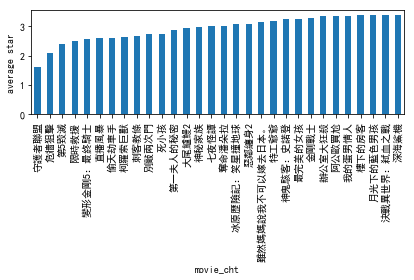

In [98]:
# 評價低卻在票房排行榜上的電影
plt.rcParams['font.sans-serif']=['SimHei'] # 使用微軟正黑體
movies_comments.groupby("movie_cht")["star"].mean().sort_values().head(30).plot.bar()
plt.ylabel("average star")
plt.tight_layout()
plt.savefig("plots/average_star.png", dpi = 500)
plt.show()

In [99]:
# 2016 與 2017 的平均票房差異 (2017 年度還沒結束)
movie_box.groupby("年度", as_index=False, sort=False)["平均票房"].mean()

,年度,平均票房
0,2016,1637697.35
1,2017,1006818.34


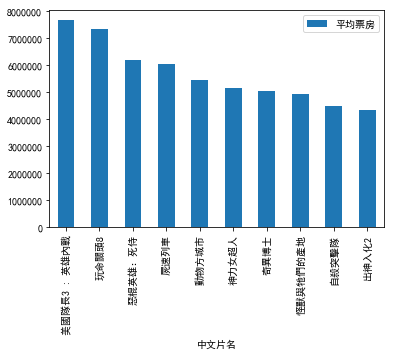

In [100]:
# 平均票房排行榜
movie_box.sort_values(by="平均票房", ascending=False)[["中文片名", "平均票房"]][:10].plot("中文片名", "平均票房", kind="bar")
plt.show()